In [11]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
#import math

def exact_sol(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi*x)/np.pi + t*x*(1-x)



In [12]:
def task4(filename: str):
    # ---------Знач----------

    f = open(filename + "_pars", "r")
    N, L, x_step, t_step, sigma = f.readline().split()
    N, L, x_step, t_step, sigma = int(N), int(
        L), float(x_step), float(t_step), float(sigma)
    f.close()
    df_expl = pd.read_csv(filename + '_vals.csv')

    plt.plot(df_expl['x'][0:N+1], df_expl['u'][:N+1], '--',
             color=[0, 0, 1], label=f'{df_expl["t"][0]}')
    for i in range(L//10, L, L//10):
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['u'][i*(N+1):(i+1)*(N+1)],
                 color='b', alpha=(i+1)/L, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    plt.title(f'Задание 3 (Знач в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, sigma={sigma}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------Погр----------

    for i in range(0, L, L//10):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)])
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], delta_u, color='b',
                 alpha=(i+1)/L, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    # plt.plot(df_expl['x'][0*(N+1):(0+1)*(N+1)], df_expl['u'][0*(N+1):(0+1)*(N+1)], color='r', alpha=1)
    plt.title(f'Задание 3 (Погр в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, sigma={sigma}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------Погр2---------

    time_arr = np.zeros(L)
    delta_arr = np.zeros(L)
    for i in range(0, L):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.max(np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)]))
        time_arr[i] = df_expl['t'][i*(N+1)]
        delta_arr[i] = delta_u
    print(f'{len(time_arr)}__{len(delta_arr)}')
    plt.plot(time_arr, delta_arr)
    plt.title(f'Задание 3 (Зависимость погр от вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, sigma={sigma}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # -------------------
    '''
    col = [0, 1, 0]
    i = 1
    plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['u'][i*(N+1):(i+1)*(N+1)], color=col, label=f'(ex) {round(df_expl["t"][i*(N+1)],3)}')
    col = [0, 1, 1]
    df_expl2 = pd.read_csv('4_vals_im.csv')
    plt.plot(df_expl2['x'][i*(N+1):(i+1)*(N+1)], df_expl2['u'][i*(N+1):(i+1)*(N+1)], '--', color=col, label=f'(im) {round(df_expl["t"][i*(N+1)],3)}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    for j in range(N+1):
        print(f"{df_expl['u'][i*(N+1)+j]} \t {df_expl2['u'][i*(N+1)+j]}")
    '''

In [13]:
def task4_im():
    f = open("4im_pars", "r")
    N, L, sigma = f.readline().split()
    N, L, sigma = int(N), int(L), float(sigma)
    f.close()
    df_expl = pd.read_csv('4im_vals.csv')
    plt.plot(df_expl['x'][0:N+1], df_expl['u'][:N+1], '--',
             color=[0, 0, 1], label=f'{df_expl["t"][0]}')
    for i in range(L//10, L, L//10):
        col = [i/(L-1), 0, 1-i/(L-1)]
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['u'][i*(N+1):(i+1)
                 * (N+1)], color=col, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    plt.title(f'Задание 4 (Знач в разные мом вр). {
              N+1}x{L+1} узлов. $sigma$={sigma}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()
    df_expl.info()

    for i in range(0, L, L//10):
        print(df_expl['u'][(i)*0])
    for i in range(0, L, L//10):
        print(df_expl['u'][(i)*(N+1)])

    # -------------------

    for i in range(0, L, L//10):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        col = [i/(L-1), 0, 1-i/(L-1)]
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], u_vals,
                 color=col, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    plt.title(f'Проверка (Знач в разные мом вр). {N+1}x{L+1} узлов')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()
    df_expl.info()

In [14]:
def task5(filename: str):
    # ---------Знач----------

    f = open(filename + "_pars", "r")
    N, L, x_step, t_step, eps = f.readline().split()
    N, L, x_step, t_step, eps = int(N), int(
        L), float(x_step), float(t_step), float(eps)
    f.close()

    df_expl = pd.read_csv(filename + '_vals.csv')

    plt.plot(df_expl['x'][0:N+1], df_expl['u'][:N+1], '--',
             color=[0, 0, 1], label=f'{df_expl["t"][0]}')
    for i in range(L//10, L, L//10):
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['u'][i*(N+1):(i+1)*(N+1)],
                 color='b', alpha=(i+1)/L, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    plt.title(f'Задание 4 (Знач в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, eps={eps}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------Погр----------

    for i in range(0, L, L//10):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)])
        plt.plot(df_expl['x'][i*(N+1):(i+1)*(N+1)], delta_u, color='b',
                 alpha=(i+1)/L, label=f'{round(df_expl["t"][i*(N+1)], 3)}')
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    # plt.plot(df_expl['x'][0*(N+1):(0+1)*(N+1)], df_expl['u'][0*(N+1):(0+1)*(N+1)], color='r', alpha=1)
    plt.title(f'Задание 4 (Погр в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, eps={eps}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    # ---------Погр2---------

    time_arr = np.zeros(L)
    delta_arr = np.zeros(L)
    for i in range(0, L):
        u_vals = exact_sol(
            df_expl['x'][i*(N+1):(i+1)*(N+1)], df_expl['t'][i*(N+1)])
        delta_u = np.max(np.abs(u_vals - df_expl['u'][i*(N+1):(i+1)*(N+1)]))
        time_arr[i] = df_expl['t'][i*(N+1)]
        delta_arr[i] = delta_u
    print(f'{len(time_arr)}__{len(delta_arr)}')
    plt.plot(time_arr, delta_arr)
    plt.title(f'Задание 4 (Зависимость погр от вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, eps={eps}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    df_iters = pd.read_csv(filename + '_iters.csv',
                           dtype={'t': np.float64, 'iters': np.int32})
    plt.plot(df_iters['t'][1:], df_iters['iters'][1:], '--', color=[0, 0, 1])
    # plt.plot(df_expl['x'][0:N], df_expl['u'][0:N])
    plt.title(f'Задание 4 (Итерации в разные мом вр). {
              N+1}x{L+1} узлов\nx_step={x_step}, t_step={t_step}, eps={eps}')
    plt.xlabel("time")
    plt.ylabel("iters")
    plt.grid(True)
    # plt.legend()
    plt.show()

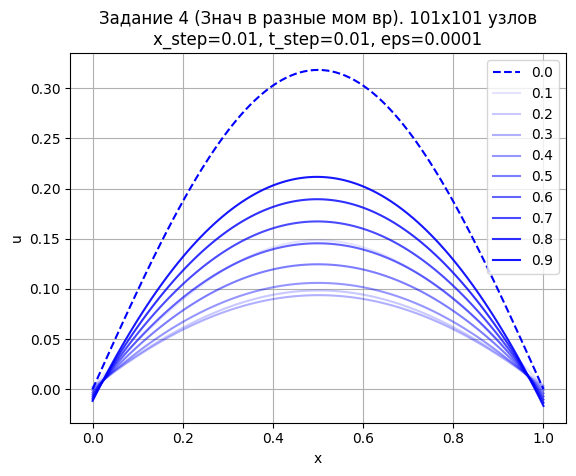

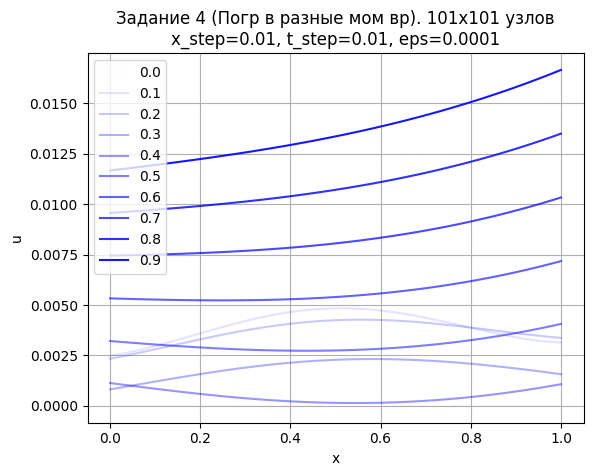

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


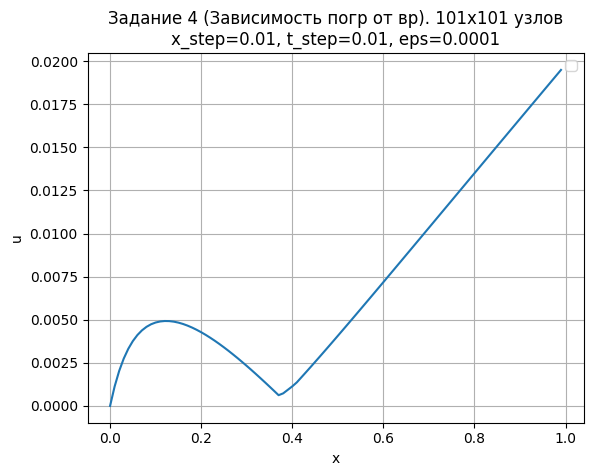

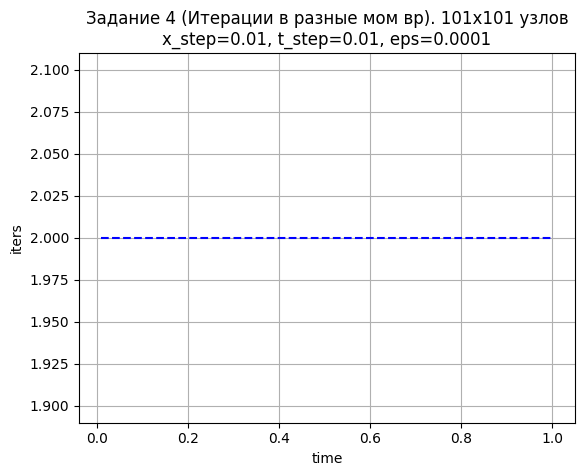

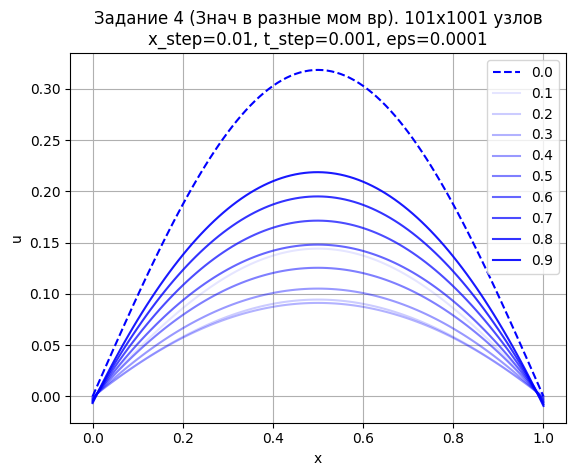

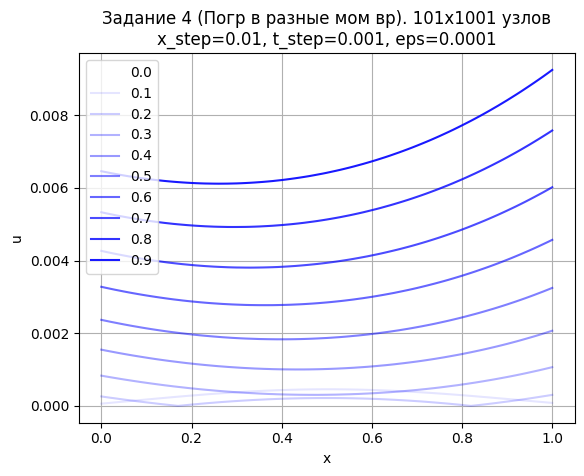

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


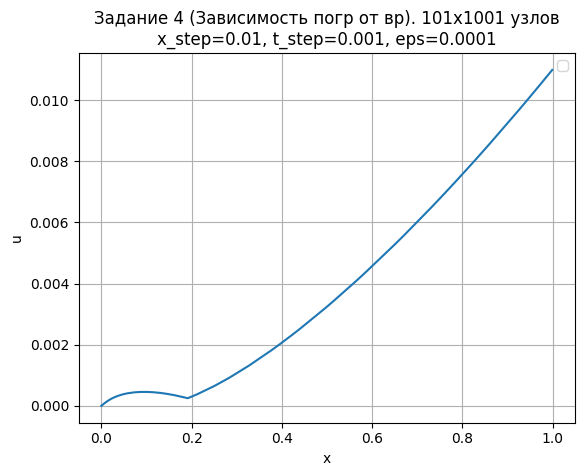

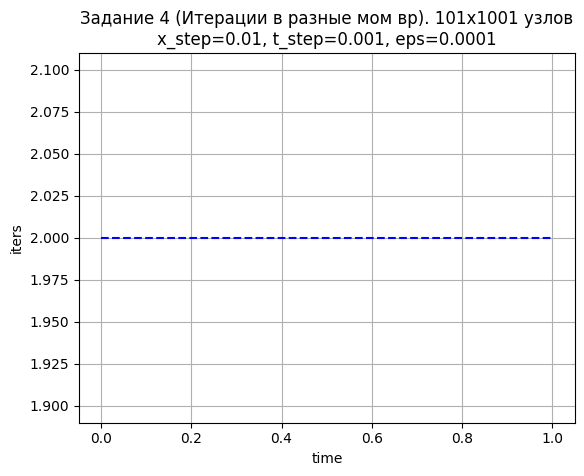

In [8]:
# check linear
for i in range(2):
    filename = f'5_check_{i}'
    task5(filename)

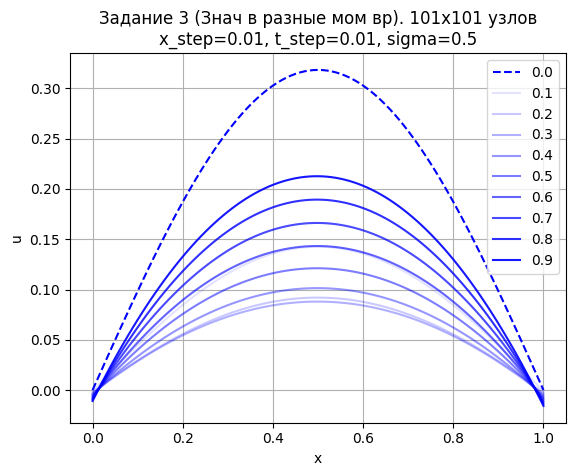

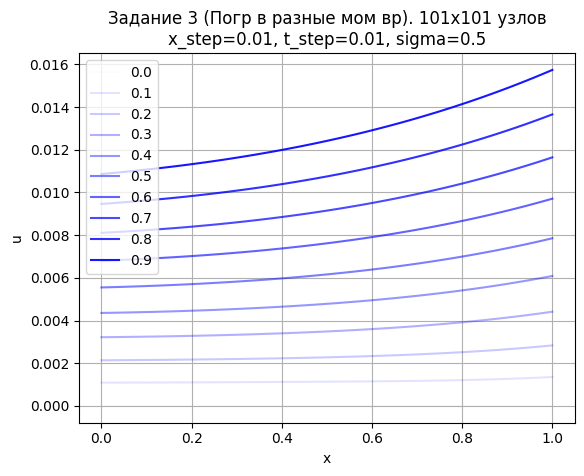

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


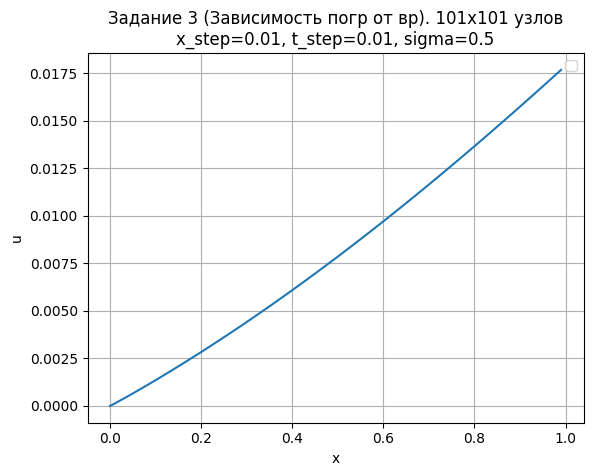

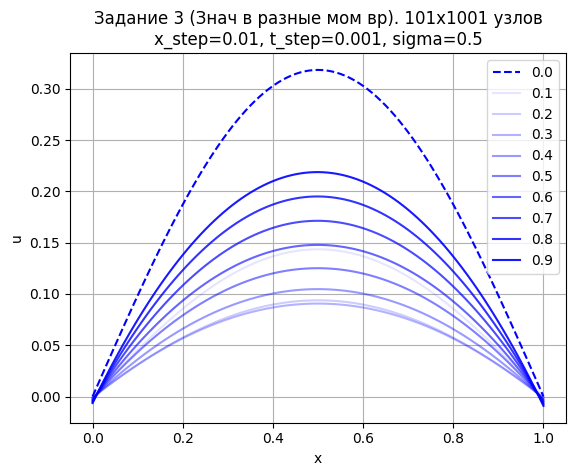

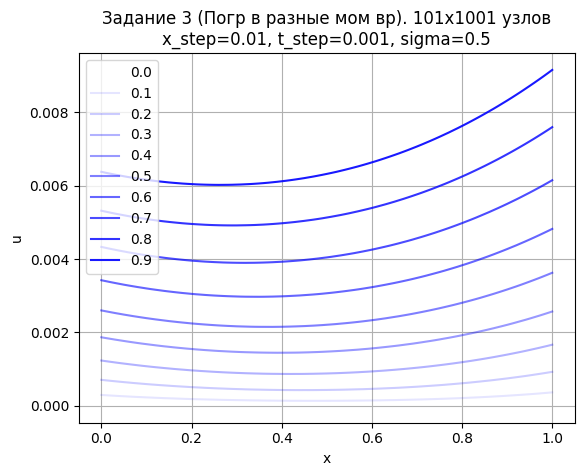

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


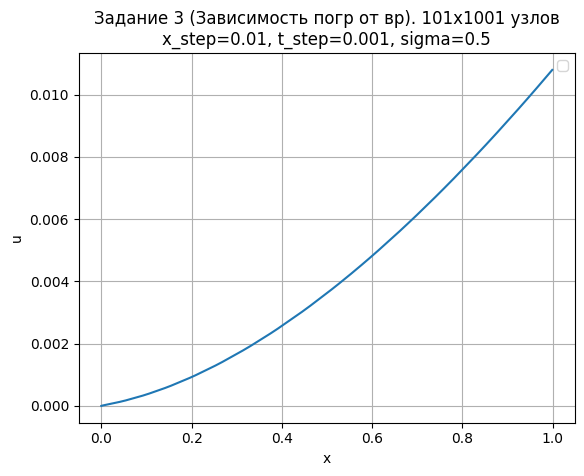

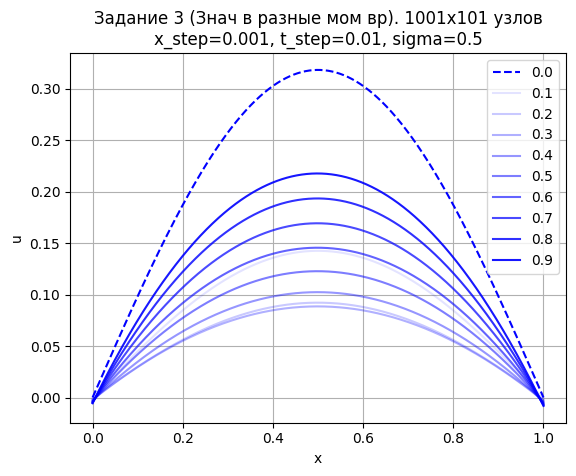

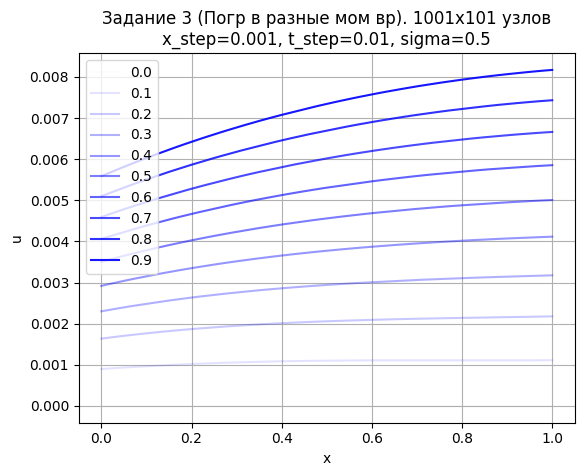

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


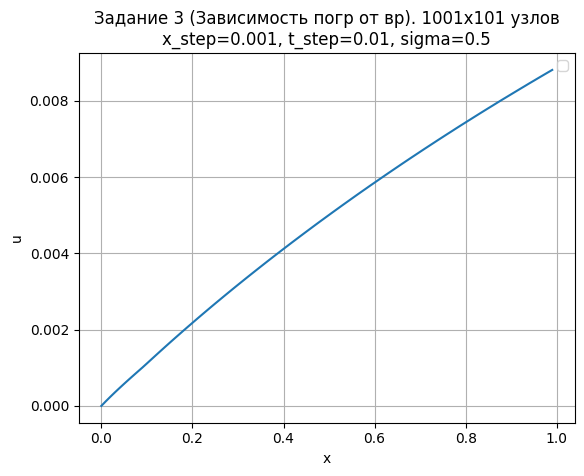

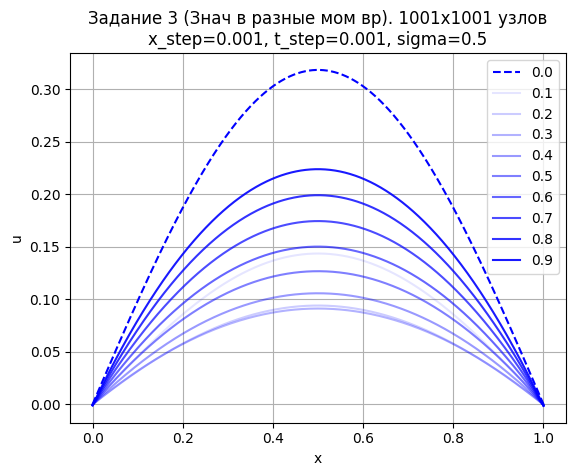

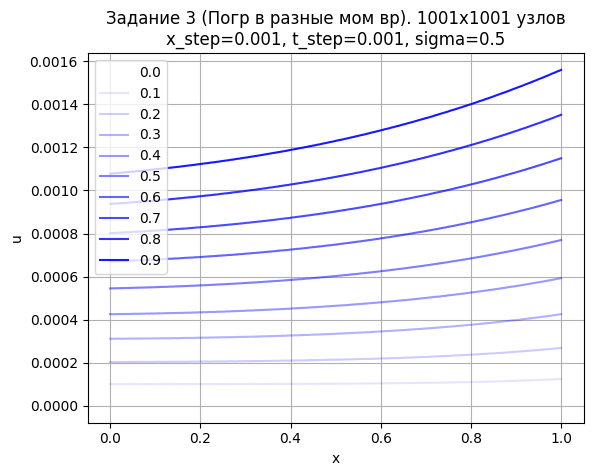

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


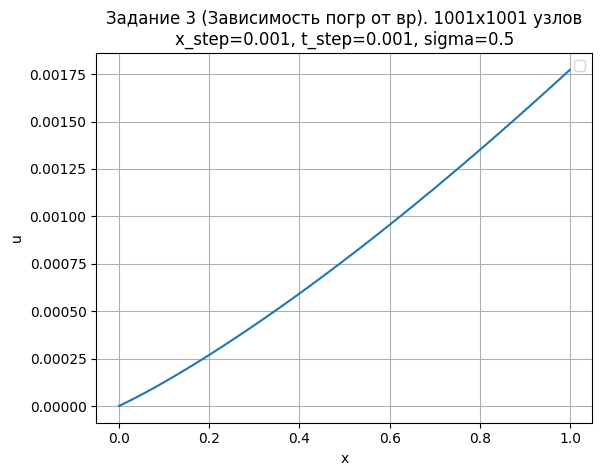

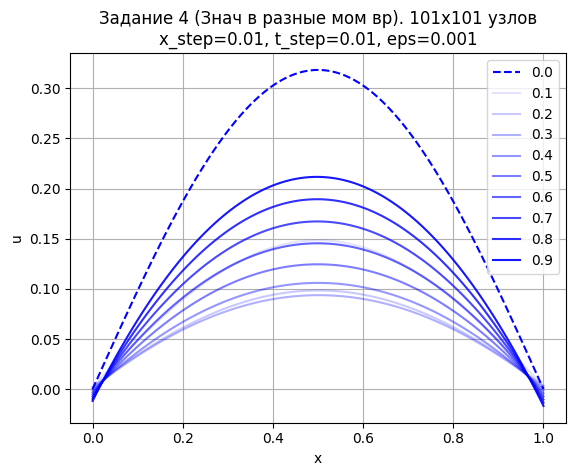

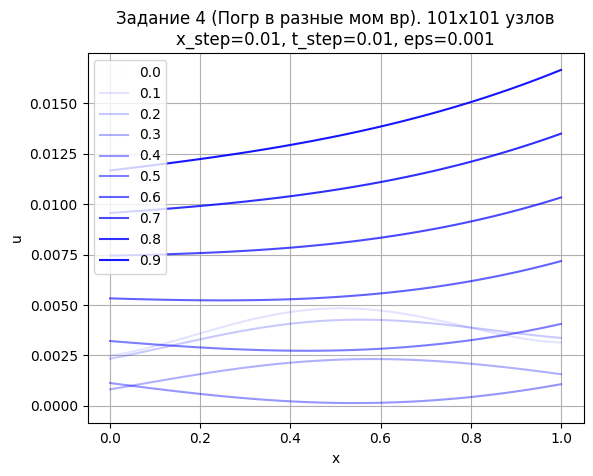

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


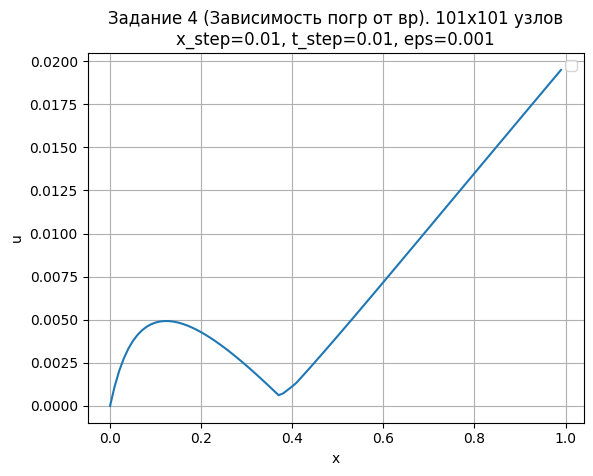

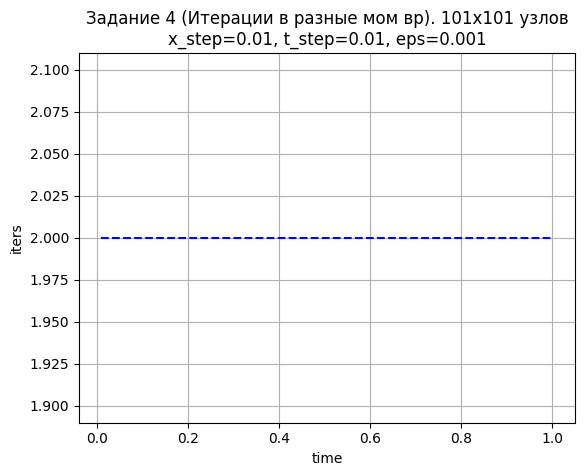

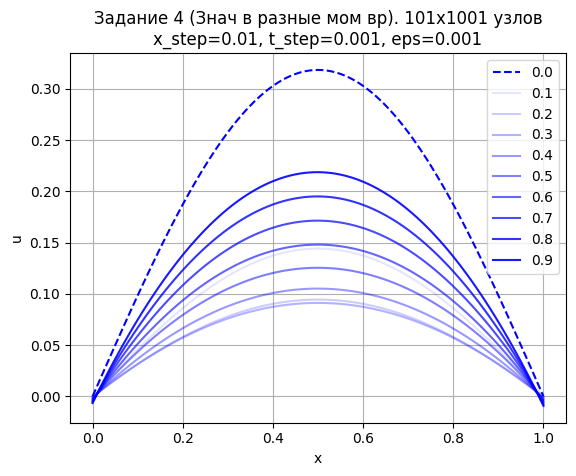

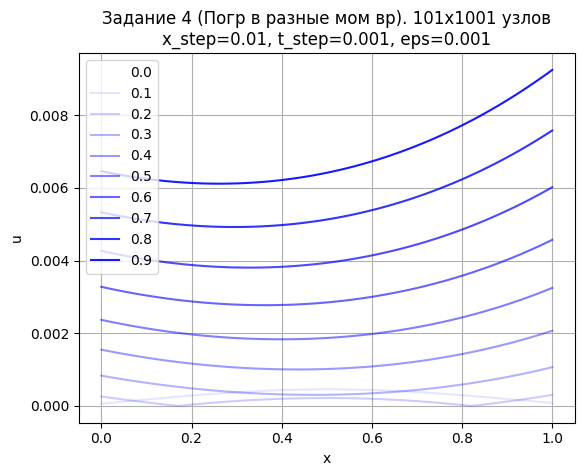

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


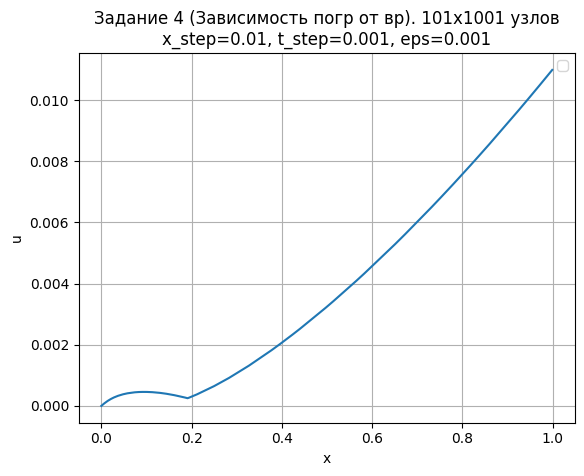

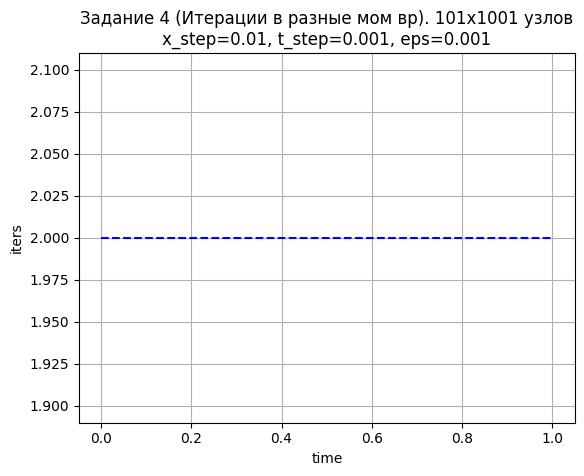

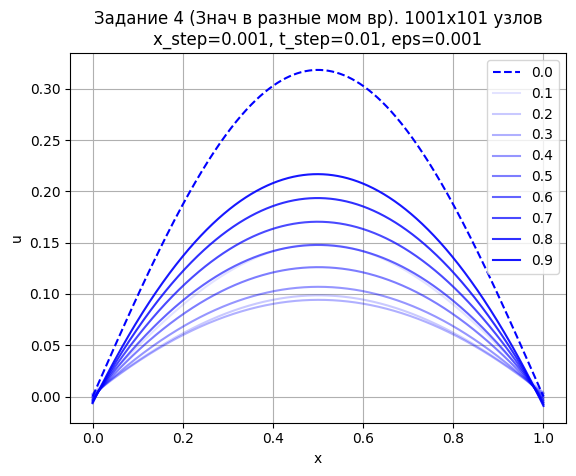

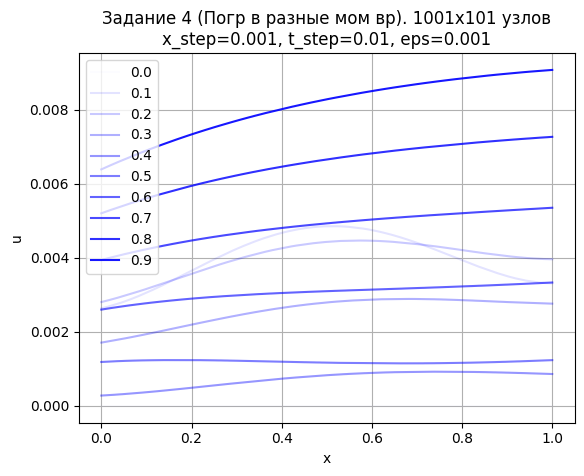

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


100__100


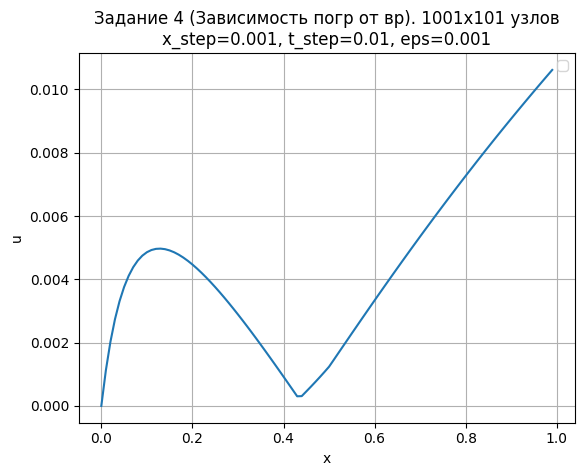

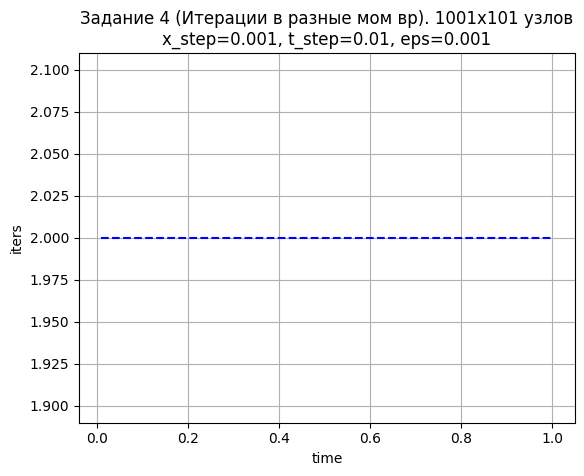

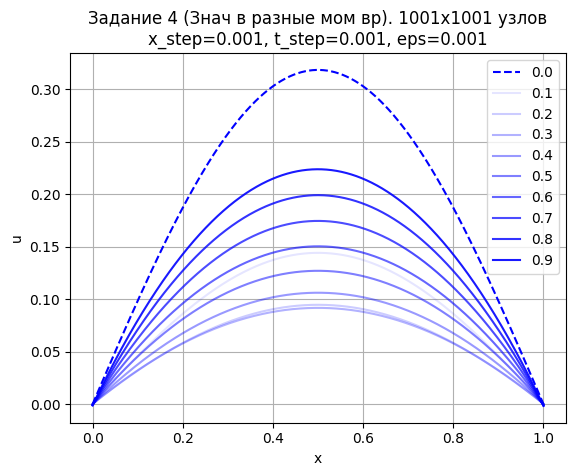

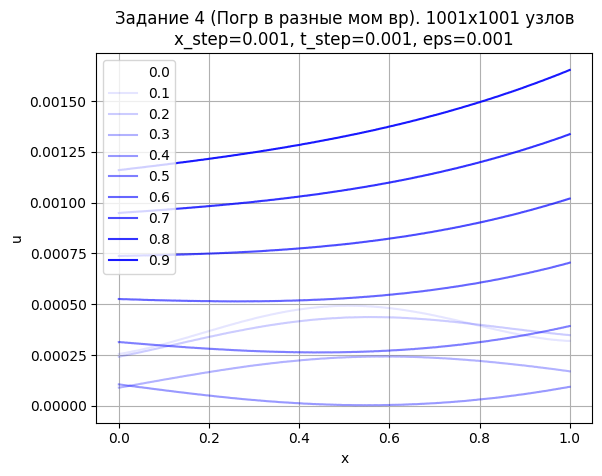

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


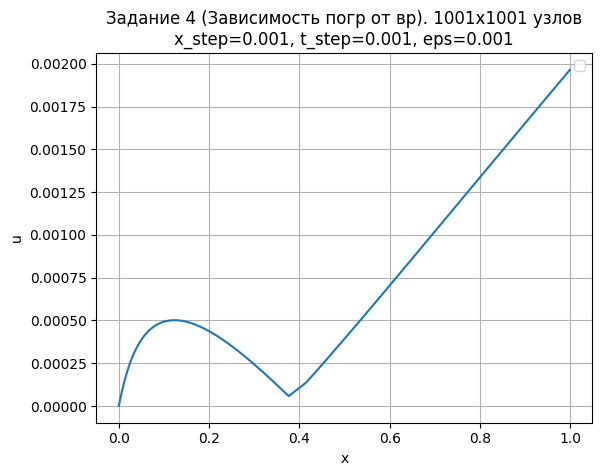

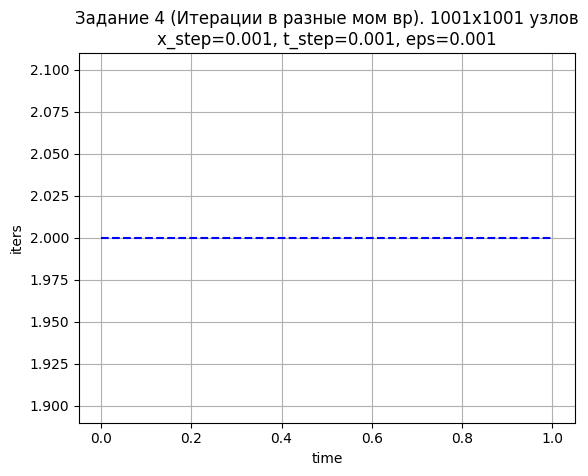

In [16]:
# Поиск значений шага для достижений одинакового уровня
# погрешности в методах (для линейной задачи)
for i in range(2):
    for j in range(2):
        filename = f'4_search_{i}_{j}'
        task4(filename)
for i in range(2):
    for j in range(2):
        filename = f'5_search_{i}_{j}'
        task5(filename)

In [ ]:
# cравнение методов

In [17]:
def task_compare(filenames):
    # ---------Знач----------

    f = open(filenames[0] + "_pars", "r")
    N, L, x_step, t_step, sigma = f.readline().split()
    N, L, x_step, t_step, sigma = int(N), int(
        L), float(x_step), float(t_step), float(sigma)
    f.close()

    f = open(filenames[1] + "_pars", "r")
    eps_1 = float(f.readline().split()[-1])
    f.close()

    f = open(filenames[2] + "_pars", "r")
    eps_2 = float(f.readline().split()[-1])
    f.close()

    df_expl_0 = pd.read_csv(filenames[0] + '_vals.csv')
    df_expl_1 = pd.read_csv(filenames[1] + '_vals.csv')
    df_expl_2 = pd.read_csv(filenames[2] + '_vals.csv')

    # ----разница 1 и 0
    time_arr = np.zeros(L)
    delta_arr = np.zeros(L)
    for i in range(0, L):
        delta_u = np.max(np.abs(
            df_expl_1['u'][i*(N+1):(i+1)*(N+1)] - df_expl_0['u'][i*(N+1):(i+1)*(N+1)]))
        time_arr[i] = df_expl_0['t'][i*(N+1)]
        delta_arr[i] = delta_u
    print(f'{len(time_arr)}__{len(delta_arr)}')
    plt.plot(time_arr, delta_arr)
    plt.title(f'Задание 4 (Разность между простым и модифиц.).\n {
              N+1}x{L+1} узлов x_step={x_step}, t_step={t_step},\n sigma={sigma}, eps={eps_1}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()

    time_arr = np.zeros(L)
    delta_arr = np.zeros(L)
    for i in range(0, L):
        delta_u = np.max(np.abs(
            df_expl_2['u'][i*(N+1):(i+1)*(N+1)] - df_expl_0['u'][i*(N+1):(i+1)*(N+1)]))
        time_arr[i] = df_expl_0['t'][i*(N+1)]
        delta_arr[i] = delta_u
    print(f'{len(time_arr)}__{len(delta_arr)}')
    plt.plot(time_arr, delta_arr)
    plt.title(f'Задание 4 (Разность между простым и модифиц.).\n {
              N+1}x{L+1} узлов x_step={x_step}, t_step={t_step},\n sigma={sigma}, eps={eps_2}')
    plt.xlabel("x")
    plt.ylabel("u")
    plt.grid(True)
    plt.legend()
    plt.show()



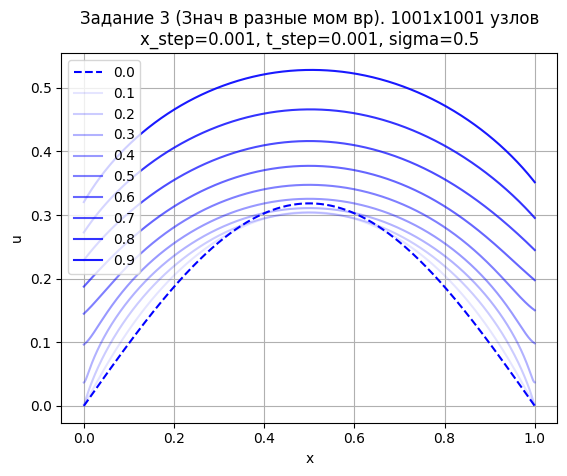

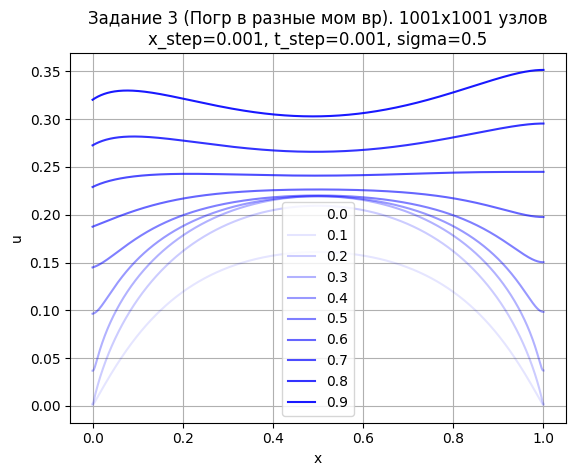

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


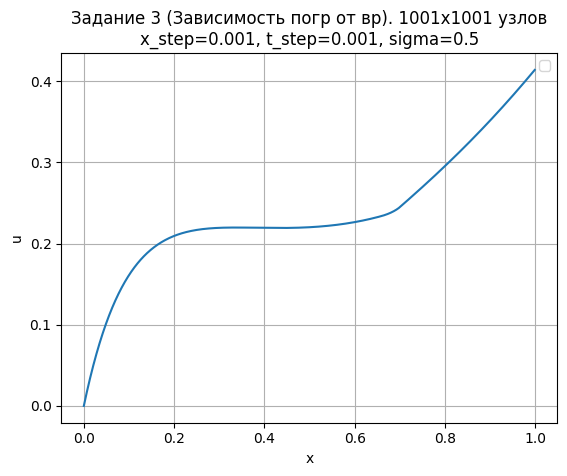

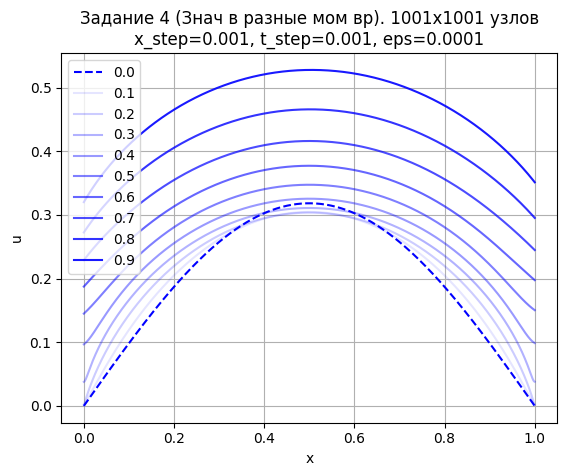

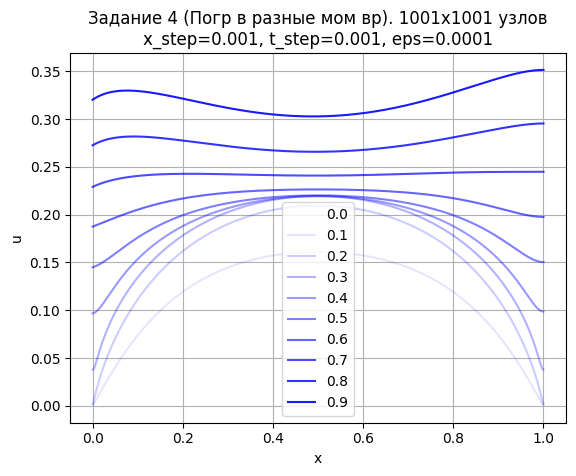

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


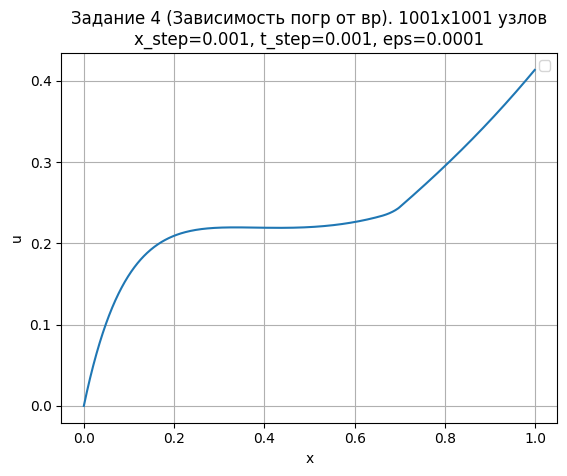

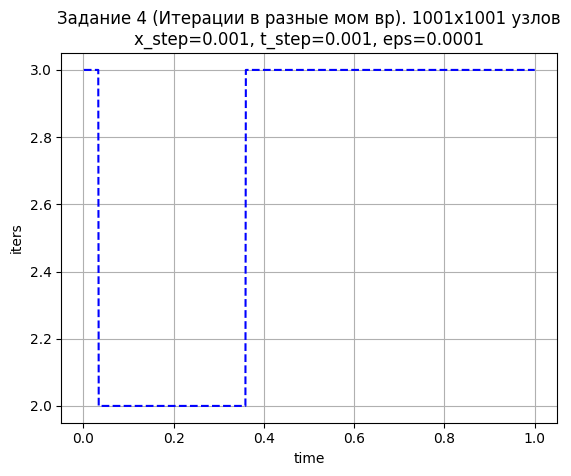

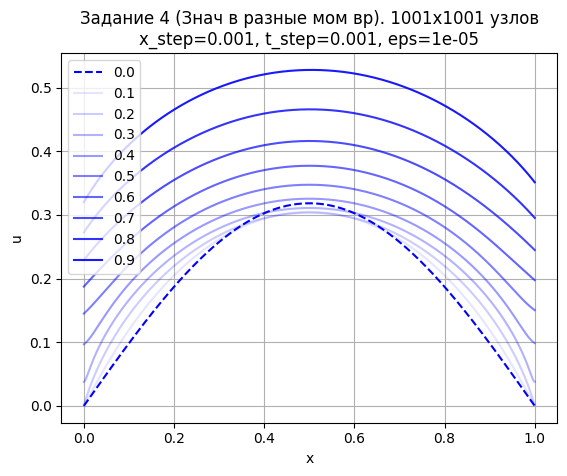

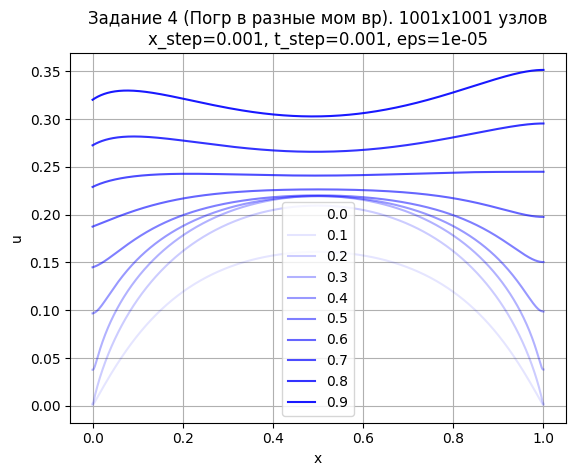

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


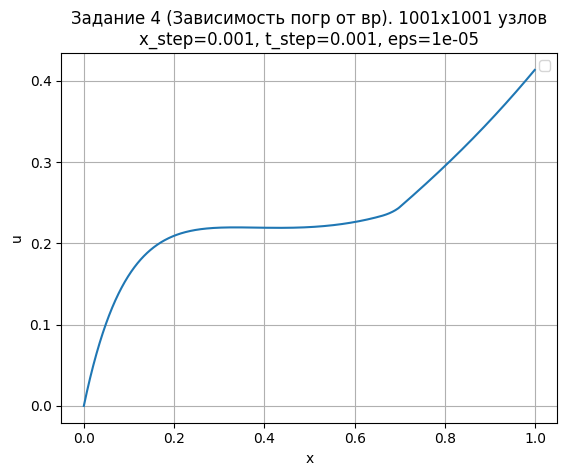

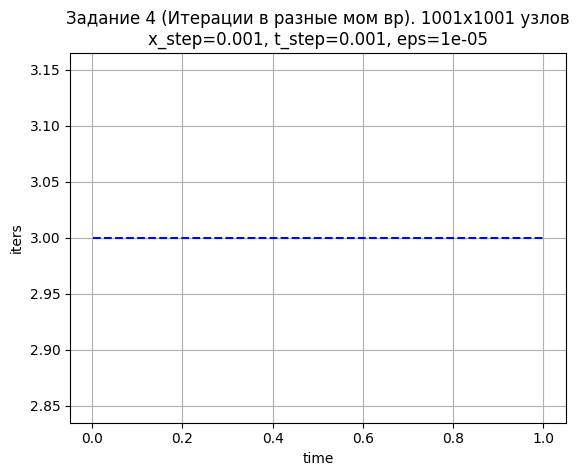

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


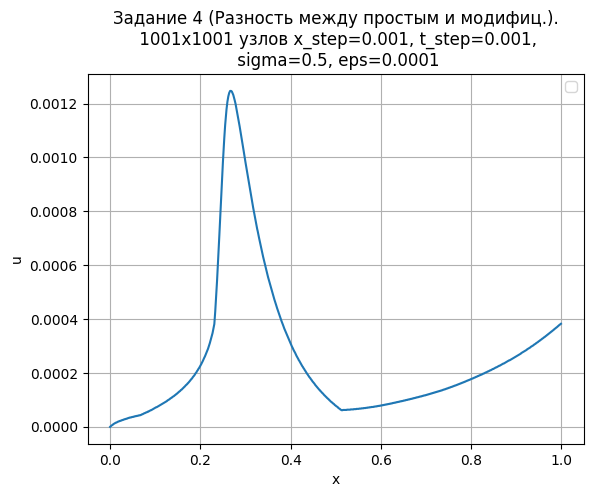

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000__1000


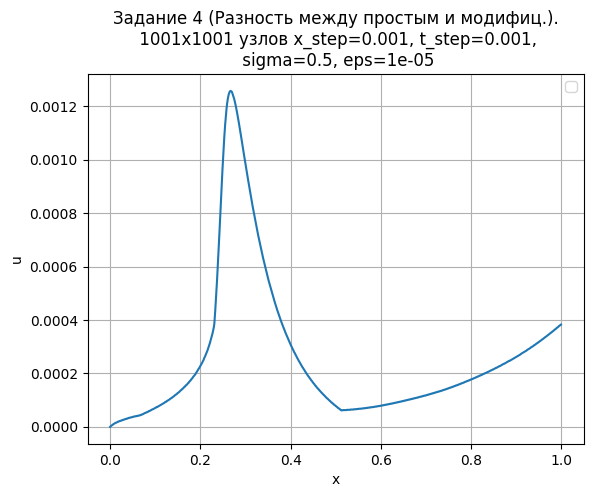

In [20]:
# сравнение
task4('4_speed')
task5('5_speed')
task5('5_speed2')
task_compare(['4_speed', '5_speed', '5_speed2'])